## [프로젝트] ResNet Ablation Study  


## Step 0. ResNet 와 Ablation Study  개념    

### # ResNet의 핵심개념과 그 효과  

#### 1. ResNet 논문의 문제의식  
서론(Introduction)을 통해 ResNet 논문이 제기하고 있는  
문제의 핵심을 명확히 정리해보자  

##### 1) 딥러닝 모델의 레이어를 깊이 쌓으면 성능이 좋아지는가?  
사실 이 질문은 핵심은 아님  
-> 이미 레이어 깊이 쌓으면 Vanishing/Exploding Gradient 문제가 발생해서  
모델 수렴 방해하는 문제 생김  
-> 이에 대해 이미 몇가지 대응법 알려져 있음  
-> normalized initialization, intermediate normalization layers

##### 2) Degradation Problem  
모델의 수렴을 방해하는 Vanishing/Exploding Gradient 문제와는 달리,  
레이어를 깊이 쌓았을 때 모델이 수렴하고 있음에도 불구하고 발생하는 문제  
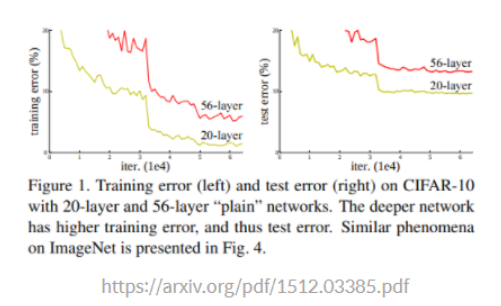      
-> Degradation Problem란?  
-> 딥러닝 모델의 레이어가 깊어졌을 때, 모델이 수렴했음에도 불구하고  
오히려 레이어 개수가 적을 때보다 모델의 training/test error가 더 커지는 현상이 발생  
-> 이는 오버피팅 때문이 아님  
-> 네트워크 구조상 레이어를 깊이 쌓았을 때 최적화가 잘 안되기 때문에 발생하는 문제  


#### 2. ResNet 논문이 제시한 솔루션 : Residual Block  

#### 1) 그럼 레이어 많이 쌓았다고, 모델 성능 떨어지는 건 어떻게 알아?  
- 저자들은 이 부분에 의미를 품음  
  -> 만약 기존 모델에 identity mapping 레이어 수십 장 덧붙였을 때,  
  성능이 떨어지지는 않음  
  (mapping: 입력과 타겟의 관계, identity mapping : 입력 값을 그대로 전달)  
  -> 그럼 레이어 많이 쌓아서 성능 떨어지는 모델은  
  identity mapping 레이어 보다 못하다는 것  
  -> 즉 많이 겹쳐 쌓은 레이어가 제대로 학습이 이루어지지 않았다는 증거가 됨  
  
#### 2) 저자들의 기발한 생각  
- x=  레이어의 입력값  
  H(x)= 학습해야 할 레이어 
  H(x) 를 F(x)+x 로 만든다면?  
  
  -> 설령 F(x)가 Vanishing Gradient현상으로 전혀 학습이 안되어 zero mapping이 되더라도  
  최종 H(x)는 최소한 identity mapping이 됨  
  -> 성능 저하는 발생하지 않음  
  
  -> 실제로 학습해야할 F(x) =  학습해야 할 레이어 H(x) - 입력값 x 한 형태  
  -> 즉 잔차(Residual)함수가 됨   
  H(x)를 직접 학습하는 것보다는 훨씬 학습이 쉽지 않겠냐 !
  
   
- 레이어의 입력값을 활용  
  -> 레이어가 "residual function"(잔차 함수) 학습하도록 함  
  = 일종의 지름길("shortcut connection: 앞에서 입력으로 들어온 값을 네트워크의 출력층에 곧바로 더해줌)을 통해  
  ( shortcut connection을 가진 ResNet의 기본 블록 = Residual Block)  
  -> 레이어가 입력값을 직접 참조하도록 레이어를 변경함  
  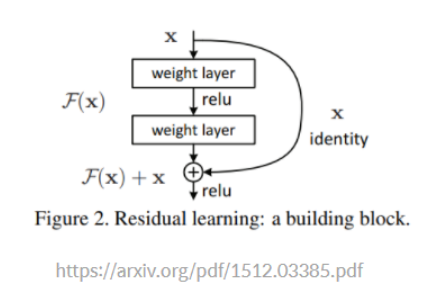  
  -> 네트워크는 출력값에서 원본 입력을 제외한 잔차(residual) 함수를 학습  
  때문에 네트워크가 ResNet이라는 이름 가지게 됨  
  
  
  - 여기서 잠깐 블록이란?  
  딥러닝 모델은 말 그대로 깊음  
   ->때문에 깊은 네트워크를 쌓는 과정에서 레이어를 쌓는 패턴이 반복되기도 함  
   ->반복되는 레이어 구조를 묶고 + 조금씩 바뀌는 부분은 변수로 조정하게끔  
   ->이렇게 만들면 레이어 구조 바꾸면서 실험하기도 편리  
   ->레이어 묶은 모듈 = 블록  
   ->조금씩 변형 준 블록 반복적으로 쌓아 딥러닝 모델 생성  
  

- 정리  
   Residual 레이어 = F(x) 라면    
   레이어 최종 출력값 = F(x)+x  
   이후 이 값은 ReLU 활성함수(activation function)를 거침  
   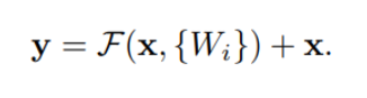    
   F(x,Wi​) = 학습되어야 할 residual mapping  
   잔차 학습(residual learning)은 이 식을 학습


### # Ablation Study?  
["In the context of deep learning, what is an ablation study?"](https://www.quora.com/In-the-context-of-deep-learning-what-is-an-ablation-study)  

- 애블레이션 연구(ablation study) = 제거 연구 란?  
  논문에서 제안 방법의 유효함 증명 위해  
  해당 방법 제거한 모델 수행결과 vs 추가한 모델 수행 결과  
  이렇게 아이이디어를 제거해서 얼마나 성능 개선, 문제 해결 가능한지 알아보는 실험  
  = 애블레이션 연구  


- ResNet 논문에서 제시한 residual connection의 애블레이션 연구  
  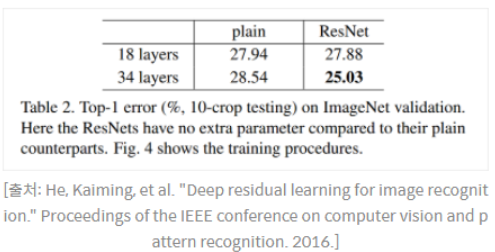  
  -> Top-1 error rate(모델이 가장 높은 확률 값으로 예측한 class 1개가 정답과 일치하는지 보는 경우의 오류율)를 지표로    
  residual connection이 없는 일반 네트워크(plain net)와 ResNet을 비교

### 필요한 라이브러리/ 패키지 import  

In [49]:
# tensorflow-datasets 패키지 설치
! pip install tensorflow-datasets

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

tf.config.list_physical_devices('GPU')

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

-----
## Step 1. ResNet, Plain 모델 생성  
- CNN  
  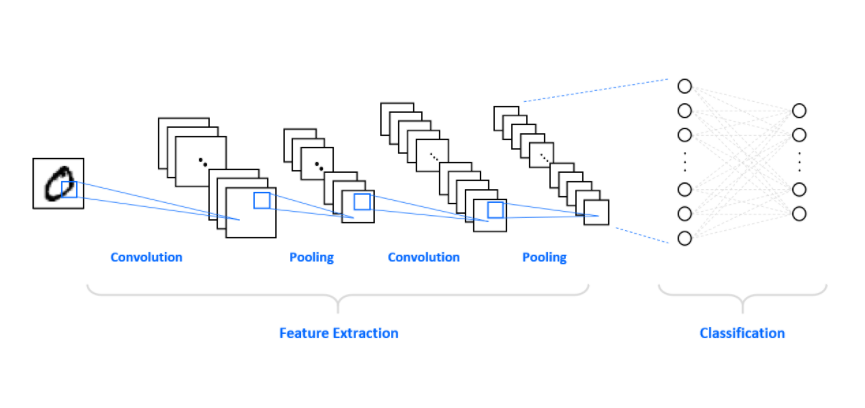

- ResNet  
  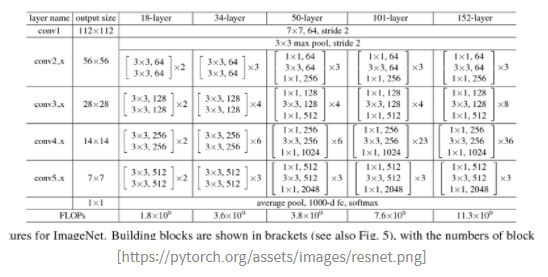  

### 1. ResNet-34

In [50]:
res_34_input_layer = keras.layers.Input(shape=(224,224,3))
x = res_34_input_layer

#--------------------stage 1 : 7x7, conv, 64 / 3x3, conv, 64---------------------------------------------------
x = keras.layers.Conv2D(64, (7,7), strides=(2,2), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPool2D(pool_size=(3,3), strides=2)(x)
shortcut = x

#--------------------stage 2 : 3x3, conv, 64-------------------------------------------------------------------
x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

#--------------------stage 3 : 3x3, conv, 128------------------------------------------------------------------
shortcut = keras.layers.Conv2D(128, (1,1), padding='same', strides=(2,2))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(128, (3,3), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

#--------------------stage 4 : 3x3, conv, 256------------------------------------------------------------------
shortcut = keras.layers.Conv2D(256, (1,1), padding='same', strides=(2,2))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(256, (3,3), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

#--------------------stage 5 : 3x3, conv, 512------------------------------------------------------------------
shortcut = keras.layers.Conv2D(512, (1,1), padding='same', strides=(2,2))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(512, (3,3), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

#-------------------------------------------------------------------------------------------------
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(2, activation='softmax')(x)

In [51]:
res_34 = keras.Model(inputs=res_34_input_layer, outputs=x)
res_34.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_166 (Conv2D)             (None, 112, 112, 64) 9472        input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_166 (BatchN (None, 112, 112, 64) 256         conv2d_166[0][0]                 
__________________________________________________________________________________________________
activation_152 (Activation)     (None, 112, 112, 64) 0           batch_normalization_166[0][0]    
____________________________________________________________________________________________

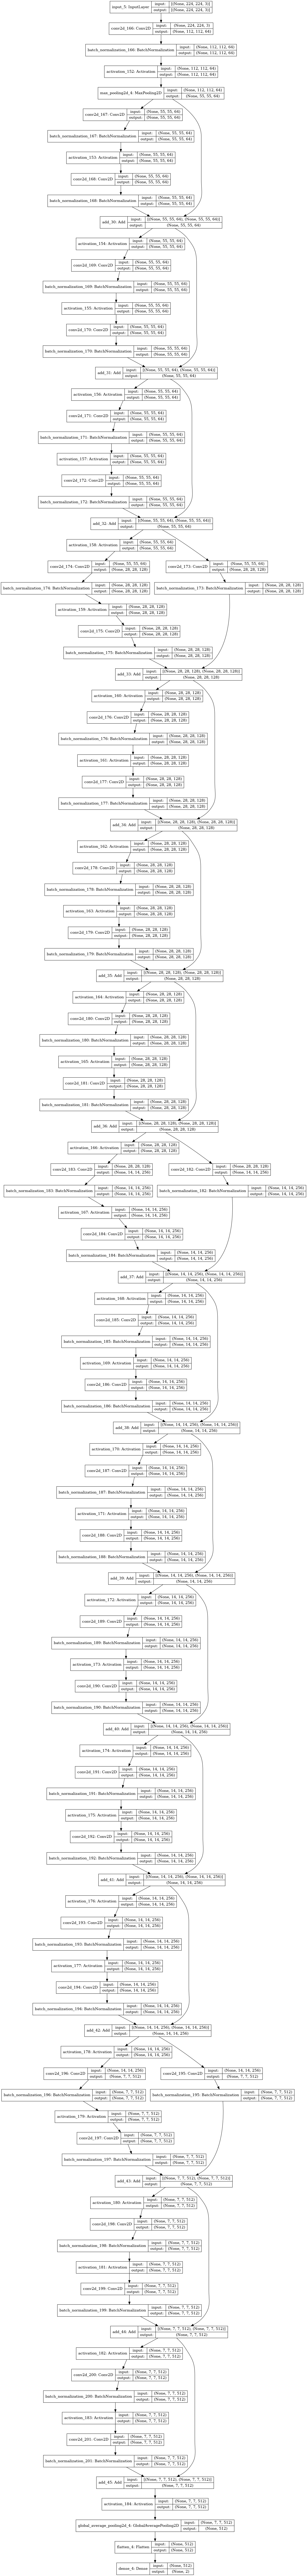

In [53]:
# resnet_34 모델의 진행과정 출력
tf.keras.utils.plot_model(res_34, to_file='./resnet_34.png', show_shapes=True)

### 2. ResNet-50  
[흐름도](http://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006)  
[KaimingHe 깃헙](https://github.com/KaimingHe/deep-residual-networks#models)

In [17]:
res_50_input_layer = keras.layers.Input(shape=(224,224,3))
x = res_50_input_layer

x = keras.layers.ZeroPadding2D((3,3))(x)

#--------------------stage 1 : 7x7, conv, 64 / 3x3, conv, 64---------------------------------------------------
x = keras.layers.Conv2D(64, (7,7), strides=(2,2), padding='valid')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.ZeroPadding2D((1,1))(x)

x = keras.layers.MaxPool2D(pool_size=(3,3), strides=2)(x)
shortcut = x

#--------------------stage 2 -----------------------------------------------------------------------------------
shortcut = keras.layers.Conv2D(256, (1,1), padding='same', strides=(1,1))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(64, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

#--------------------stage 3 -----------------------------------------------------------------------------------
shortcut = keras.layers.Conv2D(512, (1,1), padding='same', strides=(2,2))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(128, (1,1), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

#--------------------stage 4 -----------------------------------------------------------------------------------
shortcut = keras.layers.Conv2D(1024, (1,1), padding='same', strides=(2,2))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(256, (1,1), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(1024, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(1024, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(1024, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(1024, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(1024, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(1024, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

#--------------------stage 5 -----------------------------------------------------------------------------------
shortcut = keras.layers.Conv2D(2048, (1,1), padding='same', strides=(2,2))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(512, (1,1), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(2048, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

#-------------------------------------------------------------------------------------------------
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(2, activation='softmax')(x)

res_50 = keras.Model(inputs=res_50_input_layer, outputs=x)
res_50.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 112, 112, 64) 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
batch_normalization_36 (BatchNo (None, 112, 112, 64) 256         conv2d_36[0][0]                  
____________________________________________________________________________________________

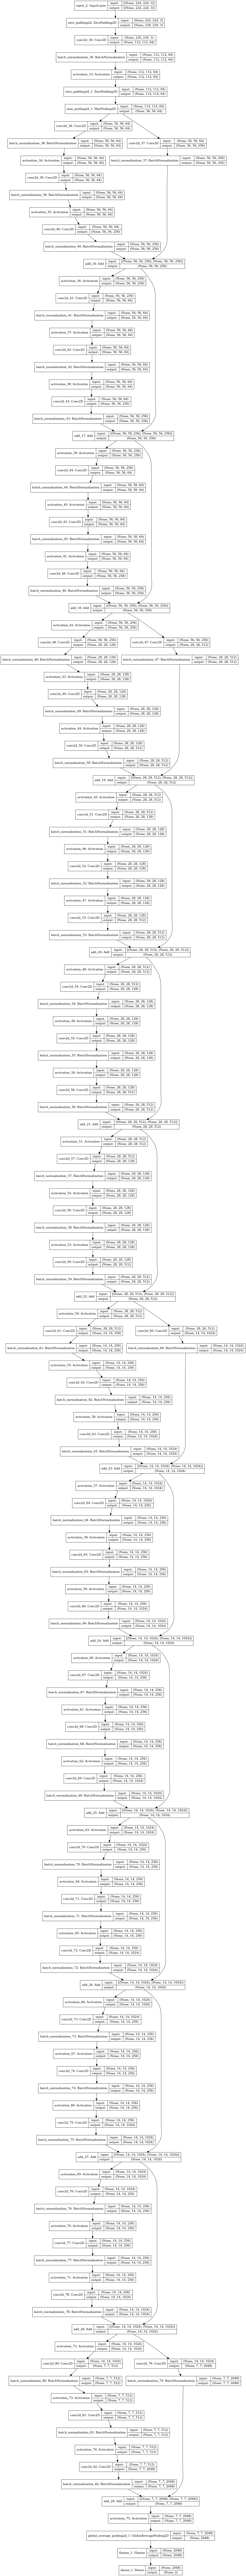

In [54]:
# resnet_50 모델의 진행과정 출력
tf.keras.utils.plot_model(res_50, to_file='./resnet_50.png', show_shapes=True)

### 3. Plain-34

In [18]:
plain_34_input_layer = keras.layers.Input(shape=(224,224,3))
x = plain_34_input_layer

#--------------------stage 1 : 7x7, conv, 64 / 3x3, conv, 64---------------------------------------------------
x = keras.layers.Conv2D(64, (7,7), strides=(2,2), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPool2D(pool_size=(2,2), strides=2)(x)

#--------------------stage 2 : 3x3, conv, 64-------------------------------------------------------------------
x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

#--------------------stage 3 : 3x3, conv, 128------------------------------------------------------------------
shortcut = keras.layers.Conv2D(128, (1,1), padding='same', strides=(2,2))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(128, (3,3), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

#--------------------stage 4 : 3x3, conv, 256------------------------------------------------------------------
shortcut = keras.layers.Conv2D(256, (1,1), padding='same', strides=(1,1))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(256, (3,3), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

#--------------------stage 5 : 3x3, conv, 512------------------------------------------------------------------
shortcut = keras.layers.Conv2D(512, (1,1), padding='same', strides=(2,2))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(512, (3,3), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (3,3), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (3,3), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

#-------------------------------------------------------------------------------------------------
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(2, activation='softmax')(x)

In [19]:
plain_34 = keras.Model(inputs=plain_34_input_layer, outputs=x)
plain_34.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 112, 112, 64)      9472      
_________________________________________________________________
batch_normalization_83 (Batc (None, 112, 112, 64)      256       
_________________________________________________________________
activation_76 (Activation)   (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 56, 56, 64)        36928     
_________________________________________________________________
batch_normalization_84 (Batc (None, 56, 56, 64)        256 

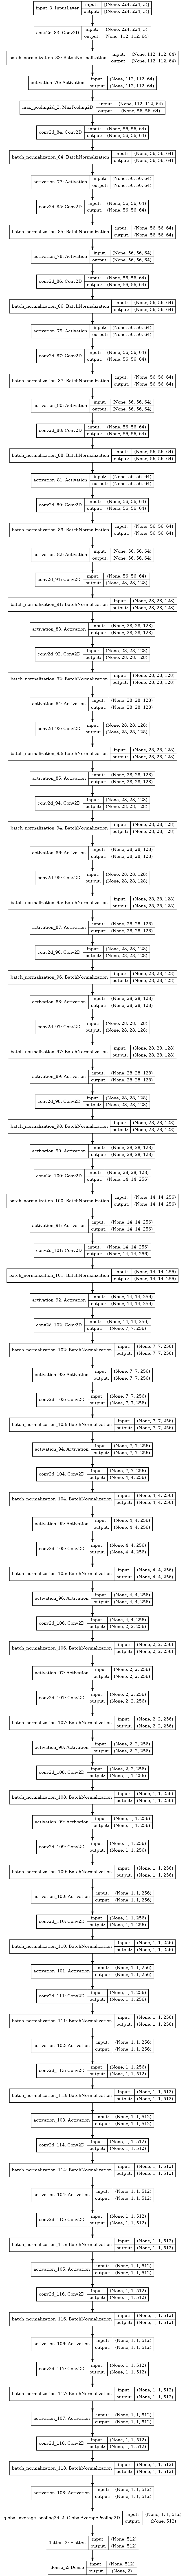

In [55]:
# plain_34 모델의 진행과정 출력
tf.keras.utils.plot_model(plain_34, to_file='./plain_34.png', show_shapes=True)

### 4. Plain-50

In [20]:
plain_50_input_layer = keras.layers.Input(shape=(224,224,3))
x = plain_50_input_layer

x = keras.layers.ZeroPadding2D((3,3))(x)

#--------------------stage 1 : 7x7, conv, 64 / 3x3, conv, 64---------------------------------------------------
x = keras.layers.Conv2D(64, (7,7), strides=(2,2), padding='valid')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.ZeroPadding2D((1,1))(x)

x = keras.layers.MaxPool2D(pool_size=(3,3), strides=2)(x)

#--------------------stage 2 -----------------------------------------------------------------------------------
shortcut = keras.layers.Conv2D(256, (1,1), padding='same', strides=(1,1))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(64, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

#--------------------stage 3 -----------------------------------------------------------------------------------
shortcut = keras.layers.Conv2D(512, (1,1), padding='same', strides=(2,2))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(128, (1,1), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

#--------------------stage 4 -----------------------------------------------------------------------------------
shortcut = keras.layers.Conv2D(1024, (1,1), padding='same', strides=(2,2))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(256, (1,1), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(1024, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(1024, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(1024, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(1024, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(1024, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(1024, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

#--------------------stage 5 -----------------------------------------------------------------------------------
shortcut = keras.layers.Conv2D(2048, (1,1), padding='same', strides=(2,2))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(512, (1,1), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(2048, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

#-------------------------------------------------------------------------------------------------
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(2, activation='softmax')(x)

plain_50 = keras.Model(inputs=plain_50_input_layer, outputs=x)
plain_50.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 230, 230, 3)       0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 112, 112, 64)      9472      
_________________________________________________________________
batch_normalization_119 (Bat (None, 112, 112, 64)      256       
_________________________________________________________________
activation_109 (Activation)  (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 64)        0   

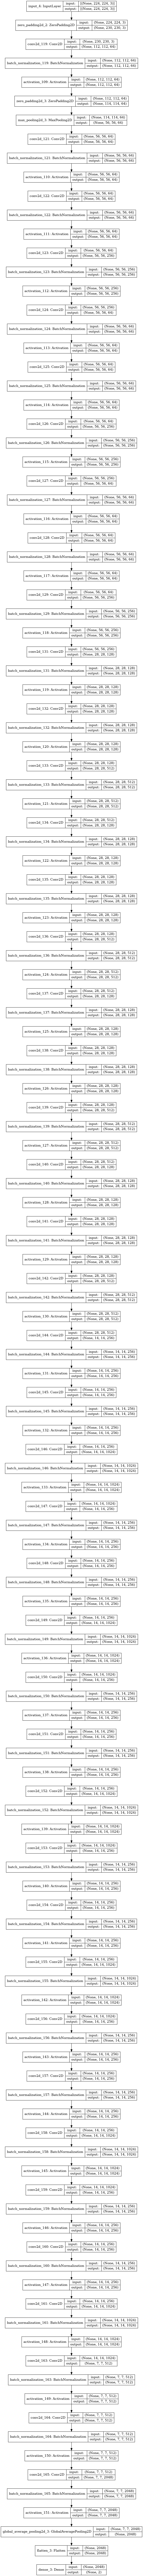

In [57]:
# plain_50 모델의 진행과정 출력
tf.keras.utils.plot_model(plain_50, to_file='./plain_50.png', show_shapes=True)

-----
## Step 2. 데이터셋 불러오기  

- 사용할 데이터셋  
  `tensorflow-datasets`에서 제공하는 `cats_vs_dogs` 데이터셋
  
  
- train : test = 80 : 20 비율로 split  

In [24]:
import urllib3
urllib3.disable_warnings()

#tfds.disable_progress_bar()   # 이 주석을 풀면 데이터셋 다운로드과정의 프로그레스바 안나타남


#tfds.load() : 기본적으로 ~/tensorflow_datasets 경로에 데이터셋을 다운로드
#데이터셋 크기가 커서, 하나의 폴더에 모아놓고 사용하는 것도 좋은 방법
#클라우드 ~/aiffel 프로젝트 폴더가 아닌 기본 경로에 다운 받아 사용하면됨
# 데이터셋 경로 바꾸고 싶으면 data_dir 인자 사용
(ds_train, ds_test), ds_info = tfds.load('cats_vs_dogs',
                                         split=['train[:80%]', 'train[80%:]'],
                                         shuffle_files=True,
                                         as_supervised=True,
                                         with_info=True)

In [25]:
# Tensorflow 데이터셋을 로드하면 꼭 feature 정보 확인 필수 
print(ds_info.features)

#채널 수 : 3

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
})


In [26]:
# 데이터 개수 확인
print(tf.data.experimental.cardinality(ds_train))
print(tf.data.experimental.cardinality(ds_test))

tf.Tensor(18610, shape=(), dtype=int64)
tf.Tensor(4652, shape=(), dtype=int64)


- Tensorflow의 데이터셋은 Numpy가 아님  
  -> ds_train.shape 같은 게 존재하지 않음  
  
  
- ResNet은 많은 레이어와 Pooling을 거치므로 CIFAR-10에서는  
  오버피팅(overfitting)으로 잘 동작하지 않을 수 있음  
  -> 레이어가 많고 학습해야 할 변수(parameter)가 많은 데 비해  
  데이터 수가 많지 않기 때문  


- 확인을 위한 정도의 epoch 설정

In [27]:
#클래스 개수
ds_info.features["label"].num_classes

2

In [28]:
#클래스 명
ds_info.features["label"].names

['cat', 'dog']

- 클래스 2개 존재 : cat, dog  

-----
## Step 3. Input Normalization  
- Data Normalization : 데이터의 범위를 사용자가 원하는 범위로 제한하는 것  
  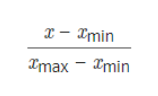      
  = (정규화하고자 하는 값 - 데이터 값들 중 최소값) / (데이터 값들 중 최대값 - 데이터 값들 중 최소값)   
  <- 이미지 데이터의 경우 픽셀 정보 0~ 255 사이의 값  
  이를 255로 나누어주면 0~ 1.0 사이의 값을 가지게 될 것  
  
  
- Data Normalization을 하는 이유  
  머신러닝에서 scale이 큰 feature의 영향이 비대해지는 것을 방지  
  Local optimum에 빠질 위험 감소(학습 속도 향상)  
  
  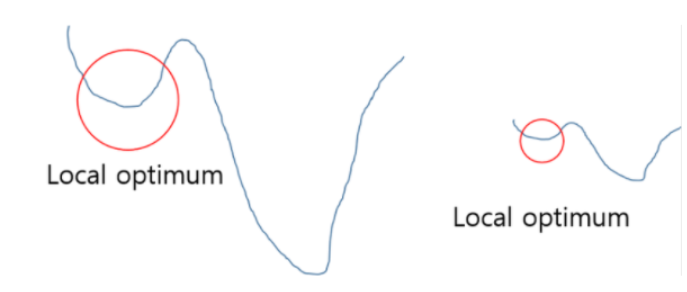    
  -> 왼쪽 = 정규화 하지 않은 경우의 Cost function  
     오른쪽 = 정규화 한 Cost function  
  -> 정규화 한 쪽(오른쪽)이 Local optimum 에서 더 빨리 빠져나올 수 있음  
  -> cikit-learn에서 MinMaxScaler로 쉽게 사용 가능  
  
  
- 모델에 넣어주기 전에는 각 채널별 최댓값 255로 정규화 해줘서  
  이미지 표현이 0~1 값이 되도록 만들어줌  

In [29]:
# 정규화
def normalize_and_resize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    # image = tf.image.resize(image, [32, 32])
    image = tf.image.resize(image, [224,224])
    return tf.cast(image, tf.float32) / 255., label

In [30]:
def apply_normalize_on_dataset(ds, is_test=False, batch_size=16):
    ds = ds.map(
        normalize_and_resize_img,
        num_parallel_calls=tf.data.experimental.AUTOTUNE #num_parallel_calls=1
    )
    ds = ds.batch(batch_size)
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

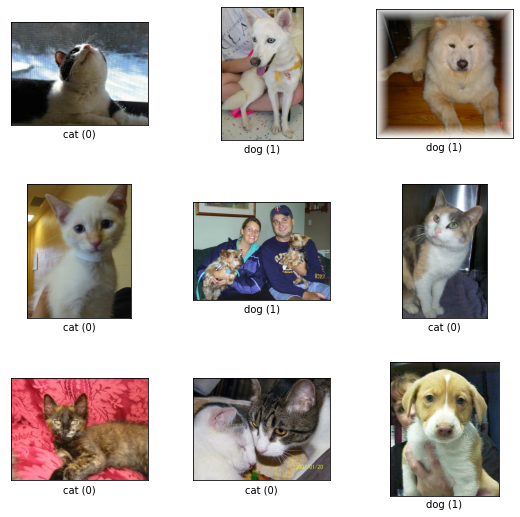

In [31]:
#훈련 이미지 확인
fig = tfds.show_examples(ds_train, ds_info)

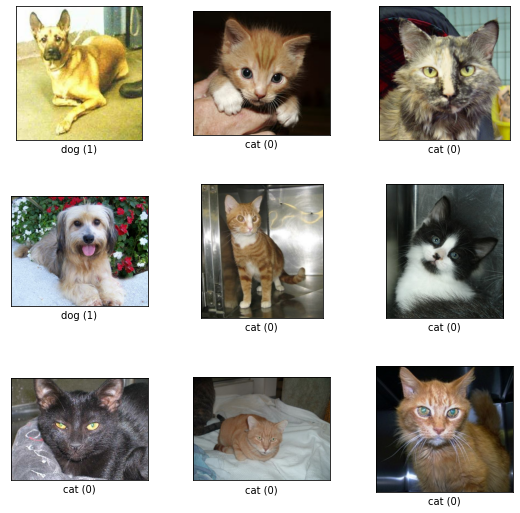

In [32]:
#테스트 이미지 확인
fig = tfds.show_examples(ds_test, ds_info)

-----
## Step 4. 모델 학습
- 학습 진행해서 각 모델 성능 비교할 예정  

In [33]:
BATCH_SIZE = 32
EPOCH = 10

In [34]:
ds_train = apply_normalize_on_dataset(ds_train, batch_size=BATCH_SIZE)
ds_test = apply_normalize_on_dataset(ds_test, batch_size=BATCH_SIZE)

### 1. ResNet -34 vs Plain-34
#### 1-1) ResNet -34

In [35]:
res_34.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_res_34 = res_34.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1
)

Epoch 1/10
581/581 [==============================] - 289s 446ms/step - loss: 0.6580 - accuracy: 0.6123 - val_loss: 0.8006 - val_accuracy: 0.5565
Epoch 2/10
581/581 [==============================] - 264s 454ms/step - loss: 0.5689 - accuracy: 0.7081 - val_loss: 0.7461 - val_accuracy: 0.6361
Epoch 3/10
581/581 [==============================] - 273s 470ms/step - loss: 0.4957 - accuracy: 0.7593 - val_loss: 0.9325 - val_accuracy: 0.6050
Epoch 4/10
581/581 [==============================] - 257s 442ms/step - loss: 0.4356 - accuracy: 0.7952 - val_loss: 0.5201 - val_accuracy: 0.7628
Epoch 5/10
581/581 [==============================] - 257s 442ms/step - loss: 0.3682 - accuracy: 0.8379 - val_loss: 1.0009 - val_accuracy: 0.6045
Epoch 6/10
581/581 [==============================] - 257s 442ms/step - loss: 0.2926 - accuracy: 0.8713 - val_loss: 0.9638 - val_accuracy: 0.6838
Epoch 7/10
581/581 [==============================] - 257s 442ms/step - loss: 0.2050 - accuracy: 0.9161 - val_loss: 0.6875 -

#### 1-2 ) Plain-34

In [36]:
plain_34.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_plain_34 = plain_34.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1
)

Epoch 1/10
581/581 [==============================] - 246s 358ms/step - loss: 0.7741 - accuracy: 0.5152 - val_loss: 1.2613 - val_accuracy: 0.4970
Epoch 2/10
581/581 [==============================] - 223s 384ms/step - loss: 0.7276 - accuracy: 0.5131 - val_loss: 1.8015 - val_accuracy: 0.5151
Epoch 3/10
581/581 [==============================] - 197s 339ms/step - loss: 0.7178 - accuracy: 0.5078 - val_loss: 0.9631 - val_accuracy: 0.4913
Epoch 4/10
581/581 [==============================] - 197s 339ms/step - loss: 0.7056 - accuracy: 0.5117 - val_loss: 0.8329 - val_accuracy: 0.5621
Epoch 5/10
581/581 [==============================] - 197s 339ms/step - loss: 0.6971 - accuracy: 0.5301 - val_loss: 2.8467 - val_accuracy: 0.4905
Epoch 6/10
581/581 [==============================] - 198s 341ms/step - loss: 0.6983 - accuracy: 0.5271 - val_loss: 3.5097 - val_accuracy: 0.5276
Epoch 7/10
581/581 [==============================] - 197s 339ms/step - loss: 0.6882 - accuracy: 0.5505 - val_loss: 0.7586 -

#### 1-3) 시각화

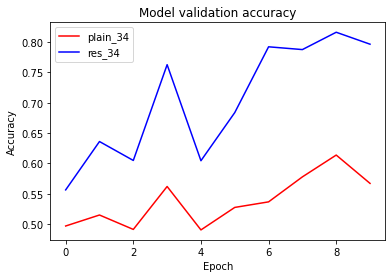

In [37]:
plt.plot(history_plain_34.history['val_accuracy'], 'r')
plt.plot(history_res_34.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['plain_34', 'res_34'], loc='upper left')
plt.show()

- Plain보다 ResNet 성능이 더 좋음  

### 2. ResNet-50 vs Plain-50

#### 1-1) ResNet-50

In [38]:
res_50.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_res_50 = res_50.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1
)

Epoch 1/10
581/581 [==============================] - 446s 694ms/step - loss: 0.6621 - accuracy: 0.6077 - val_loss: 0.8798 - val_accuracy: 0.5489
Epoch 2/10
581/581 [==============================] - 440s 758ms/step - loss: 0.6175 - accuracy: 0.6623 - val_loss: 0.7683 - val_accuracy: 0.6065
Epoch 3/10
581/581 [==============================] - 403s 694ms/step - loss: 0.6078 - accuracy: 0.6709 - val_loss: 0.7257 - val_accuracy: 0.6110
Epoch 4/10
581/581 [==============================] - 402s 692ms/step - loss: 0.5908 - accuracy: 0.6870 - val_loss: 1.9251 - val_accuracy: 0.5219
Epoch 5/10
581/581 [==============================] - 403s 693ms/step - loss: 0.5684 - accuracy: 0.7020 - val_loss: 0.5881 - val_accuracy: 0.6872
Epoch 6/10
581/581 [==============================] - 402s 692ms/step - loss: 0.5441 - accuracy: 0.7228 - val_loss: 0.8884 - val_accuracy: 0.5739
Epoch 7/10
581/581 [==============================] - 403s 693ms/step - loss: 0.5174 - accuracy: 0.7408 - val_loss: 0.5696 -

#### 1-2) Plain-50

In [39]:
plain_50.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_plain_50 = plain_50.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1
)

Epoch 1/10
581/581 [==============================] - 352s 581ms/step - loss: 0.7032 - accuracy: 0.5347 - val_loss: 1.8726 - val_accuracy: 0.5201
Epoch 2/10
581/581 [==============================] - 337s 580ms/step - loss: 0.7052 - accuracy: 0.5236 - val_loss: 0.7944 - val_accuracy: 0.5237
Epoch 3/10
581/581 [==============================] - 337s 579ms/step - loss: 0.7019 - accuracy: 0.5208 - val_loss: 0.9888 - val_accuracy: 0.5165
Epoch 4/10
581/581 [==============================] - 337s 579ms/step - loss: 0.6958 - accuracy: 0.5430 - val_loss: 1.3221 - val_accuracy: 0.5030
Epoch 5/10
581/581 [==============================] - 337s 579ms/step - loss: 0.6934 - accuracy: 0.5530 - val_loss: 0.7814 - val_accuracy: 0.5303
Epoch 6/10
581/581 [==============================] - 336s 579ms/step - loss: 0.6892 - accuracy: 0.5620 - val_loss: 0.8723 - val_accuracy: 0.5496
Epoch 7/10
581/581 [==============================] - 336s 579ms/step - loss: 0.6797 - accuracy: 0.5745 - val_loss: 0.6785 -

#### 1-3) 시각화

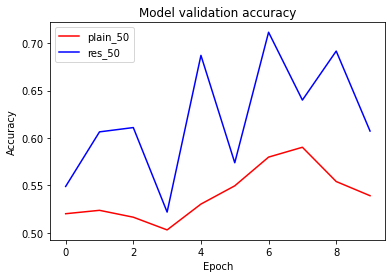

In [40]:
plt.plot(history_plain_50.history['val_accuracy'], 'r')
plt.plot(history_res_50.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['plain_50', 'res_50'], loc='upper left')
plt.show()

- Plain보다 ResNet 성능이 더 좋음  

-----
## Step 5. 성능(결과) 비교  



### 1. train

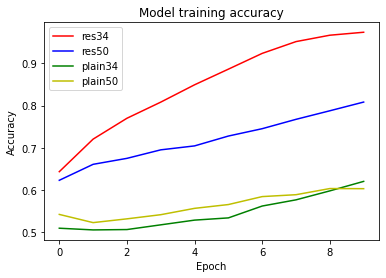

In [46]:
plt.plot(history_res_34.history['accuracy'], 'r')
plt.plot(history_res_50.history['accuracy'], 'b')
plt.plot(history_plain_34.history['accuracy'], 'g')
plt.plot(history_plain_50.history['accuracy'], 'y')
plt.title('Model training accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['res34', 'res50', 'plain34', 'plain50'], loc='upper left')
plt.show()

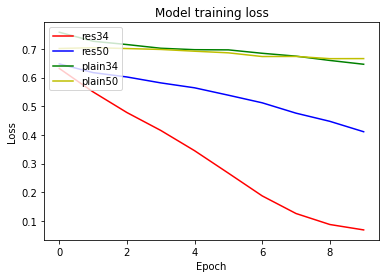

In [41]:
import matplotlib.pyplot as plt

plt.plot(history_res_34.history['loss'], 'r')
plt.plot(history_res_50.history['loss'], 'b')
plt.plot(history_plain_34.history['loss'], 'g')
plt.plot(history_plain_50.history['loss'], 'y')
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['res34', 'res50', 'plain34', 'plain50'], loc='upper left')
plt.show()

### 2. val

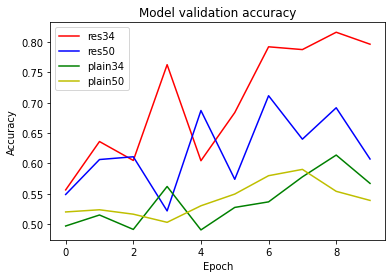

In [47]:
plt.plot(history_res_34.history['val_accuracy'], 'r')
plt.plot(history_res_50.history['val_accuracy'], 'b')
plt.plot(history_plain_34.history['val_accuracy'], 'g')
plt.plot(history_plain_50.history['val_accuracy'], 'y')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['res34', 'res50', 'plain34', 'plain50'], loc='upper left')
plt.show()

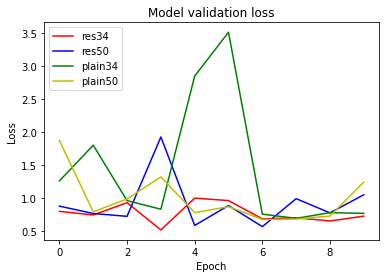

In [43]:
plt.plot(history_res_34.history['val_loss'], 'r')
plt.plot(history_res_50.history['val_loss'], 'b')
plt.plot(history_plain_34.history['val_loss'], 'g')
plt.plot(history_plain_50.history['val_loss'], 'y')
plt.title('Model validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['res34', 'res50', 'plain34', 'plain50'], loc='upper left')
plt.show()

|  |val_loss|val_accuracy|
|---|---|---|
|res-34|0.7282|0.7965|
|plain-34|0.7702|0.5672|
|res-50|1.0521|0.6074|
|plain-50|1.2439|0.5391|

- ResNet 논문에서는 ResNet을 이용해서  
  깊은 레이어를 쌓아서 학습시키면 성능이 가장 좋아하야하는데  
  (res-50,> res-34 > plain-34> plain-50)  
  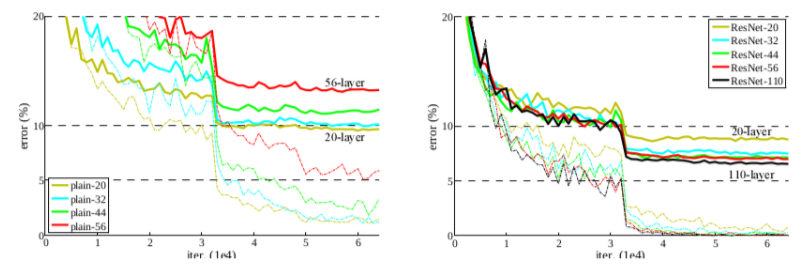  
  
  근데  
  실제로 학습시킨 결과는 val 기준으로 봤을때 눈에 띄게 좋지는 않았다  
  하지만 validation accuracy 기준으로 Ablation Study 결과를 생각해보면  
  논문과 동일한 순의 성능 순위도를 가진다  


-----
## 회고  

### 💚루브릭 평가  
##### 1. ResNet-34, ResNet-50 모델 구현이 정상적으로 진행되었는가?
- 블록함수 구현이 제대로 진행되었으며 구현한 모델의 summary가 예상된 형태로 출력되었다  
- 인풋 이미지 사이즈를 상민 퍼실님의 추천으로 인풋 이미지 사이즈를 크게 만들어주었고  
  예상된 형태로 출력되었다  
  

##### 2. 구현한 ResNet 모델을 활용하여 Image Classification 모델 훈련이 가능한가?
- cats_vs_dogs 데이터셋으로 학습시 몇 epoch동안 안정적으로 loss 감소가 진행 확인됨  


##### 3. Ablation Study 결과가 바른 포맷으로 제출되었는가?
- ResNet-34, ResNet-50 각각 plain모델과 residual모델을 동일한 epoch만큼 학습시켰을 때의  
  validation accuracy 기준으로 Ablation Study 결과표가 작성되었다.  

### 💚  개선할 점 + 배운점
##### 1) 블록 생성  
블록 생성하려고, 했는데 계속 오류가 나서..  
그냥 레이어를 하나하나 쌓았다  
블록이 아니더라도 def로 함수 생성하는 방법도 있는데  
생각하지 못했어서, 이후에 도전해봐야하는 과제로 남았다  
( TMI : 완벽하지 못한 것 같아 죄책감이 많이 드는편이였는데  
이제는 다시 공부하러 올 때 재밌을 만하게 기초의 길을 잘 닦자!  
생각하니까 좀 나중에 다시보러와서 성공하면 우와 진짜 재밌겠다 싶어서  
얼른 한번 보고 다시 공부하고 싶어졌다~ ㅎㅎ)  
다음에 개선할 점으로~ 남겨두기로 !

##### 2) DenseNet, SENet  
위 두 알고리즘은 핵심 개념만 배우고 넘어갔는데  
레즈넷처럼 논문 읽고 깊은 이해를 하고싶다  
나무 뼈대 하나는 세웠으니, 가지들까지 깊게 깊게 해보고싶은 !  
퍼실님들이 이번 노드에 나오는 논문 들은 하나하나 너무 중요하다고 하셨으니까  
차차 읽어나가면 재밌을 것 같다  
뿌리만 세우러 다니는데, 가지까지 만들면 ㅎㅎ


##### 3) 모델 만들기  
이번에 하나하나 뜯어볼 수 있었던 경험이었다  
항상 쓱 보고 넘겼다면  
이번에는 코드 하나하나 보면서,  
여기선 커널이 뭐하고, 활성화 함수가 뭐하고, 피쳐 맵이 어떻게 변하고  
이런것까지 생각하면서 볼 수 있었던 노드였다  
에러도 많이나고, shape이 너무 안맞아서 어질어질 했지만...
이정도면 잘 극복한걸로 ㅠㅠ  
이번에도,,시간이 더 있었다면 좋았겠다..

##### 4) 결과 분석시 이미지 출력  
상민퍼실님의 프로젝트 회고에서 결과 분석시 그래프가 아닌  
실제 이미지를 넣어서, 개/고양이 분류를 해봐야겠다고 하셨다  
왜,,ㅎ 나는 이런 생각을 못했지 싶다  
아직도 프로젝트의 큰 흐름을 보지 못하고, 근시안적 사고를 가지고 있는 것 같다  
더 배우면, 더 시야가 넓어지겠지,, 더 많이 공부해야겠다  


### 💚 참고자료  
1) [합성곱 신경망 기초이해](https://codetorial.net/tensorflow/convolutional_neural_network.html)  

2) [이호진님_프로젝트](https://nbviewer.org/github/ghwlsdl/AIFFEL-Going_Deeper/blob/main/%5BGD-2%5D/%5BGD-2%5D%20ResNet%20Ablation.ipynb) : ResNet 진행과정 출력 (tf.keras.utils.plot_model()), ResNet 블록 구조  

3) [ResNet-50 conv층마다 def 구현](https://eremo2002.tistory.com/76)  

4)[Residual Network 구현](https://heung-bae-lee.github.io/2020/01/12/deep_learning_06/)  

5) [상민퍼실님 프로젝트](https://github.com/kkk3449/first-repository/blob/master/%5BGD1%5DCV_ResNet.ipynb) : input 사이즈, 모델 shape 참고, 그래프 출력으로 결과 비교 아이디어  

6) [그 외 참고 프로젝트](https://nbviewer.org/github/ljh415/AIFFEL/blob/master/Going_Deeper/01.ResNet_Ablation_Study/ResNet_Ablation_Study.ipynb) : 블록, 함수 및 변수명 설명 잘되어 있는편

7) [ResNet 논문리뷰 블로그_1](https://codebaragi23.github.io/machine%20learning/3.-ResNet-paper-review/)  

8) [ResNet 논문리뷰 블로그_2](https://jxnjxn.tistory.com/22)